Group Members: Sinny Ye (sy544), Brian Liu (bjl229), Caio Teig (cb733)


#### Research Questions: SPY vs. VTI

**Global Events:**
- Natural disasters, elections, wars, pandemics

**SPY:**
- S&P 500 ETF (Large-Cap Stocks (S&P 500))

**VTI:***
- Vanguard Total Stock Market ETF (4000+ Stocks)


**Overall Question: How does the performance (in terms of total returns and volatility) of large-cap stocks (S&P 500 ETF) compare to the broader market (Vanguard Total Stock Market ETF) over the pas Compt 10 years? Compared to VTI?**
- How does the performance (in terms of total returns and volatility) of large-cap stocks (S&P 500 ETF) compare to the broader market (Vanguard Total Stock Market ETF) over the past 10 years?

**Sub-Question: Do they have a positive or negative correlation with each other? So those who invest in S&P could have an idea of how the Vanguard would react  in SHow do both react to significant economic events, such as the COVID-19 pandemic, in terms of market drop and recovery?**
1. Do they have a positive or negative correlation with each other? So those who invest in S&P could have an idea of how the Vanguard would react 
2. How do both react to significant economic events, such as the COVID-19 pandemic, in terms of market drop and recovery?
3. How do both ETFs react to market drops and recoveries in response to these events, and what can this tell investors about market behavior?


### Summary Statistics (Before, During, and After Global Events)

#### Mean & Median Returns (Average Performance):
- **What**: Calculate the average and median returns for SPY and VTI over specific time periods (e.g., daily, weekly, monthly) around global events.
- **Why**: Helps identify general trends or patterns in stock performance before, during, and after these events.

#### Standard Deviation & Variance (Volatility):
- **What**: Measure the volatility of each ETF. A higher standard deviation or variance indicates more significant fluctuations.
- **Why**: Compare the volatility of SPY and VTI to see if smaller caps (in VTI) show more risk during certain types of events. This will highlight which ETF is more sensitive to market swings.

#### Peak & Trough (Max and Min):
- **What**: Identify the maximum and minimum values (peak and trough) in performance for both SPY and VTI.
- **Why**: Helps assess the severity of market downturns during major events and whether one ETF is hit harder than the other. This also reveals if specific events trigger more extreme reactions.
ons in future crises?


**Importing Packages**

In [1]:
import numpy as np
import pandas as pd
import duckdb
import seaborn
import time
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression


**Uploading CSV Files**

In [2]:
VTI_df = pd.read_csv('VTI10Y.csv')
SPY_df = pd.read_csv('SPY10Y.csv')

**Cleaning and Merging Files:**
1) Making sure there aren't any unnecessary columns in the dataframe
2) Merging VTI and SPY into one dataframe (TotalIndex)
3) Renaming Columns

In [3]:
VTI_df.columns = VTI_df.columns.str.strip()
SPY_df.columns = SPY_df.columns.str.strip()
VTI_df['Date'] = pd.to_datetime(VTI_df['Date'])
SPY_df['Date'] = pd.to_datetime(SPY_df['Date'])

VTIPrices = VTI_df[['Date','Open']] 
SPYPrices = SPY_df[['Date','Open']]
TotalIndex = duckdb.sql('\
    SELECT VTIPrices.Date, VTIPrices.Open, SPYPrices.Open \
    FROM VTIPrices INNER JOIN SPYPrices \
    ON VTIPrices.Date = SPYPrices.Date \
    ORDER BY SPYPrices.Date;').df()
TotalIndex.rename(columns={'Open': 'VTI','Open_1': 'SPY'}, inplace=True)

C:\Users\brian\AppData\Local\Temp\ipykernel_27948\4205913967.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  VTI_df['Date'] = pd.to_datetime(VTI_df['Date'])


**Plotting Prices Chronologically for VTI and SPY**

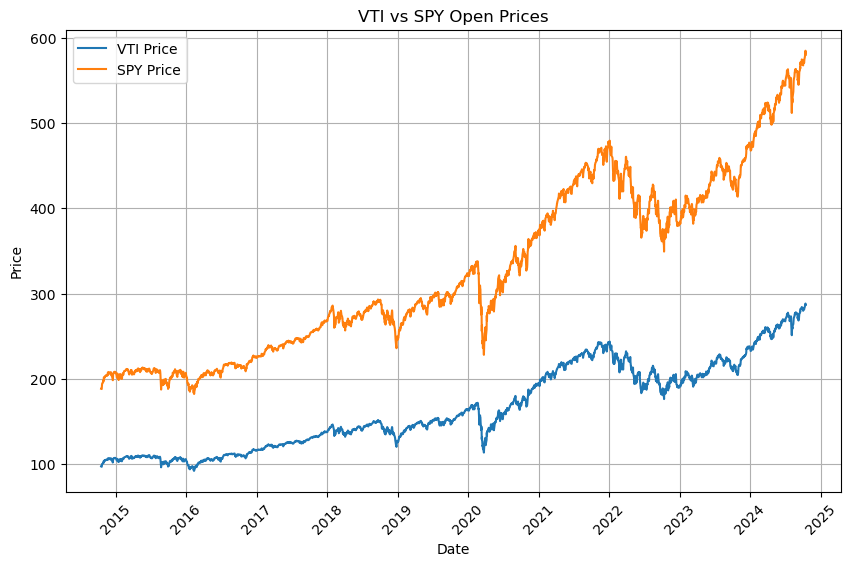

In [4]:
plt.figure(figsize=(10,6))
plt.plot(TotalIndex['Date'], TotalIndex['VTI'], label='VTI Price')
plt.plot(TotalIndex['Date'], TotalIndex['SPY'], label='SPY Price')
plt.title('VTI vs SPY Open Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()

**Graph 1: VTI vs Spy Open Prices** 

Total Returns: This graph shows that SPY (S&P 500) has generally outperformed VTI (broader market) in terms of price growth over the past 10 years. This suggests that the small and mid-cap stocks in VTI do not generally grow as quickly as their large-cap (S&P 500) counterparts


Volatility: Both ETFs experienced significant volatility during the COVID-19 pandemic, with prices dropping sharply in early 2020. However, SPY (S&P 500) showed a quicker recovery and larger fluctuations, indicating that while large-cap stocks may be more volatile during periods of turmoil, they are also more likely to recover and bounce back faster than their smaller-cap counterparts.

Reaction to Economic Events: Both ETFs reacted similarly to the COVID-19 pandemic (sharp decline followed by recovery), but SPY had a steeper recovery, reflecting the resilience of large-cap stocks during this period. This would provide insights into how investors might anticipate reactions in one ETF based on theother.


**Computing Statistics**

In [5]:
TotalIndex['VTI_Returns'] = TotalIndex['VTI'].pct_change()
TotalIndex['SPY_Returns'] = TotalIndex['SPY'].pct_change()
TotalIndex.fillna(0, inplace=True)

vti_mean = TotalIndex['VTI_Returns'].mean()
vti_std = TotalIndex['VTI_Returns'].std()
vti_min = TotalIndex['VTI_Returns'].min()
vti_max = TotalIndex['VTI_Returns'].max()
spy_mean = TotalIndex['SPY_Returns'].mean()
spy_std = TotalIndex['SPY_Returns'].std()
spy_min = TotalIndex['SPY_Returns'].min()
spy_max = TotalIndex['SPY_Returns'].max()

stats_df = pd.DataFrame({
    'Statistic': ['Mean', 'Standard Deviation', 'Minimum', 'Maximum'],
    'VTI': [vti_mean, vti_std, vti_min, vti_max],
    'SPY': [spy_mean, spy_std, spy_min, spy_max]
})

stats_df

,Statistic,VTI,SPY
0,Mean,0.000489,0.000503
1,Standard Deviation,0.010912,0.010595
2,Minimum,-0.086744,-0.087994
3,Maximum,0.066885,0.063489


**Plotting the Daily Returns**

**Plotting Linear Regression on Cumulative Amounts**
1) Create new Date_Ordinal, stores date as a number since date of inception
2) Calculate cumulative or total change in the value of an investment over a period, considering all the daily returns up to that point
3) Normalize the data points so a trend is more apparent

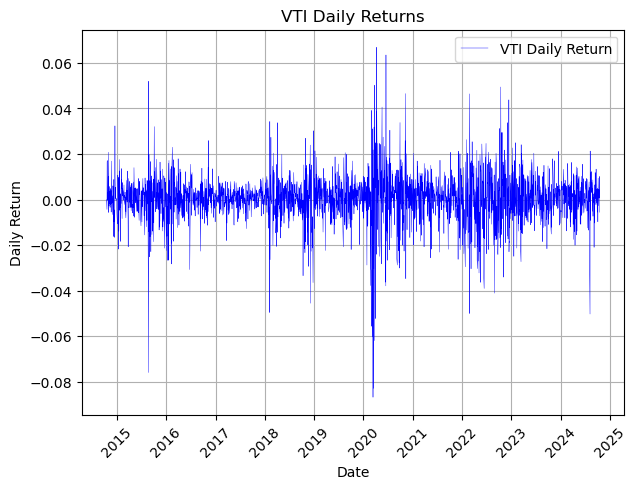

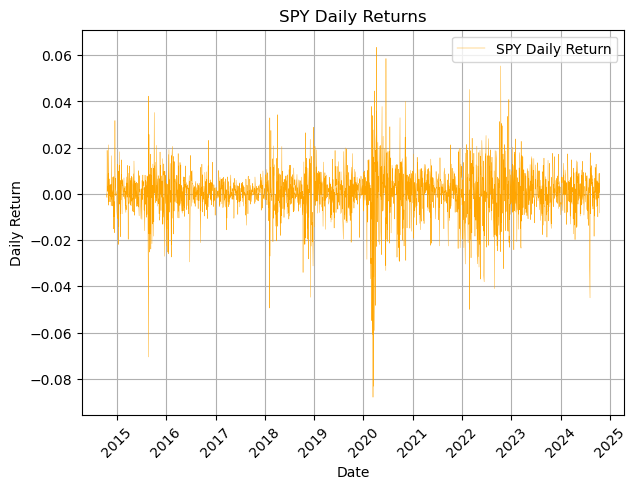

In [6]:
# First figure for VTI
plt.figure(figsize=(7, 5)) 
plt.plot(TotalIndex['Date'], TotalIndex['VTI_Returns'], color='blue', 
         label='VTI Daily Return', linewidth=0.3)
plt.title('VTI Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Second figure for SPY
plt.figure(figsize=(7, 5))
plt.plot(TotalIndex['Date'], TotalIndex['SPY_Returns'], color='orange', 
         label='SPY Daily Return', linewidth=0.3)
plt.title('SPY Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

***Graph 2 : VTI vs SPY Statistic*** 
<br>
*Mean (Average Daily Return):* 
<br>
*VTI:* 0.000489, SPY: 0.000503. SPY has a slightly higher daily return, suggesting large-cap stocks have generated marginally better returns than the broader market.
<br>

*Standard Deviation (Volatility):* 
<br>
*VTI:* 0.010912, SPY: 0.010595. Both ETFs show similar volatility, with SPY slightly more volatile, indicating comparable day-to-day return fluctuations.
<br>

*Minimum/Maximum Daily Return:* <br>
Minimum: VTI: -0.086744, SPY: -0.087994. Both saw similar largest drops, with SPY performing marginally worse during downturns. <br>
Maximum: VTI: 0.066885, SPY: 0.063489. VTI saw slightly better gains on some days, possibly due to smaller-cap stocks performing exceptionally well.
<br>
<br>

**How these statistics answer our research question** <br>
Total Returns: <br>
The mean daily return of SPY (0.000503) is slightly higher than that of VTI (0.000489). While this difference is small, it suggests that large-cap stocks (SPY) may have provided slightly better returns compared to the broader market (VTI) over the period analyzed.
<br>

Volatility: <br>
The standard deviation of SPY (0.010595) is very close to that of VTI (0.010912), indicating that both ETFs experienced similar volatility over time. This implies that, on a daily basis, both large-cap stocks and the broader market experienced similar fluctuations in returns, although SPY was marginally less volatile. 
<br>

Reaction to Significant Economic Events: <br>
The minimum and maximum daily returns provide insight into how each ETF reacted during extreme market events. Both ETFs saw similar maximum drops and gains, with SPY having a slightly worse minimum return during downturns (e.g., COVID-19 crash) and VTI having a slightly higher maximum daily return during positive market conditions.
<br>

This suggests that, while both ETFs reacted similarly during significant economic events, SPY (large-cap stocks) may have been slightly more vulnerable during downturns, but VTI saw higher peaks during recovery periods.

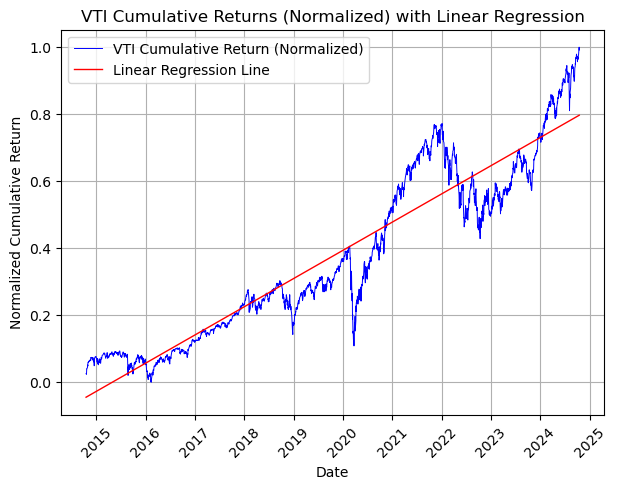

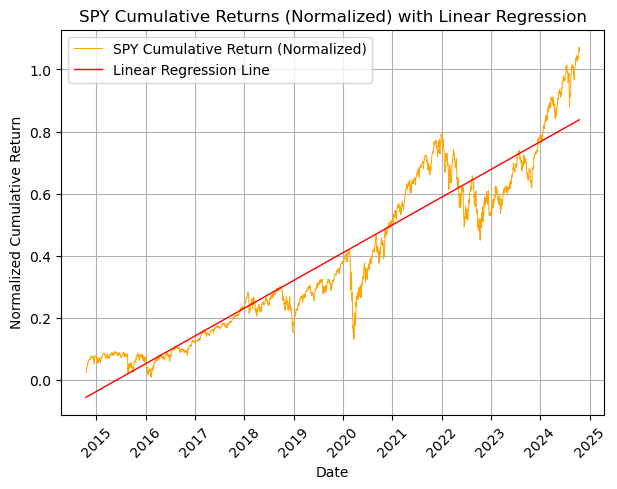

In [7]:
#Creating Date_Ordinal and Cumulative data points
TotalIndex['Date_Ordinal'] = pd.to_datetime(TotalIndex['Date']
                                           ).map(pd.Timestamp.toordinal)
TotalIndex['VTI_Cumulative'] = (1 + TotalIndex['VTI_Returns']).cumprod() - 1
TotalIndex['SPY_Cumulative'] = (1 + TotalIndex['SPY_Returns']).cumprod() - 1

#VTI Code

#Calculating the relative min and max for cumulative to help with normalization
vti_min = TotalIndex['VTI_Cumulative'].min()
vti_max = TotalIndex['VTI_Cumulative'].max()
TotalIndex['VTI_Cumulative_Normalized'] = (TotalIndex['VTI_\
Cumulative'] - vti_min) / (vti_max - vti_min)

#Reshaping values so they can be plotted onto linear regression
x_vti = TotalIndex['Date_Ordinal'].values.reshape(-1, 1)
y_vti_cum_norm = TotalIndex['VTI_Cumulative_Normalized'].values

vti_model = LinearRegression()

vti_model.fit(x_vti, y_vti_cum_norm)
vti_pred_cum_norm = vti_model.predict(x_vti)

#Plot
plt.figure(figsize=(7, 5))
plt.plot(TotalIndex['Date'], TotalIndex['VTI_Cumulative_Normalized'], 
         color='blue', label='VTI Cumulative Return (Normalized)', linewidth=0.7)
plt.plot(TotalIndex['Date'], vti_pred_cum_norm, color='red', 
         label='Linear Regression Line', linewidth=1)
plt.title('VTI Cumulative Returns (Normalized) with Linear Regression')
plt.xlabel('Date')
plt.ylabel('Normalized Cumulative Return')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

#SPY Code
spy_min = TotalIndex['SPY_Cumulative'].min()
spy_max = TotalIndex['SPY_Cumulative'].max()
TotalIndex['SPY_Cumulative_Normalized'] = (TotalIndex['SPY_Cumulative'] 
                                           - vti_min) / (vti_max - vti_min)

x_spy = TotalIndex['Date_Ordinal'].values.reshape(-1, 1)
y_spy_cum_norm = TotalIndex['SPY_Cumulative_Normalized'].values

spy_model = LinearRegression()

spy_model.fit(x_spy, y_spy_cum_norm)
spy_pred_cum_norm = spy_model.predict(x_spy)
 
plt.figure(figsize=(7, 5))
plt.plot(TotalIndex['Date'], TotalIndex['SPY_Cumulative_Normalized'], 
         color='orange', label='SPY Cumulative Return (Normalized)', linewidth=0.7)
plt.plot(TotalIndex['Date'], spy_pred_cum_norm, color='red', 
         label='Linear Regression Line', linewidth=1)
plt.title('SPY Cumulative Returns (Normalized) with Linear Regression')
plt.xlabel('Date')
plt.ylabel('Normalized Cumulative Return')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

**Graph 3: daily returns of VTI & SPI**
<br>
These two plots display the daily returns of VTI (Vanguard Total Stock Market ETF) and SPY (S&P 500 ETF) from 2015 to 2025, which provide a deeper look into the volatility and market reactions for both ETFs over time.
<br>

*VTI:* The top plot shows the day-to-day fluctuations in VTI's returns. Most daily returns fall within the range of -0.02 to 0.02, with several sharp spikes and drops, particularly around 2020, coinciding with the onset of the COVID-19 pandemic. A significant drop in early 2020 reflects the market crash, followed by large upward and downward movements, indicating heightened volatility during the recovery phase.
<br>

*SPY:* Similar to VTI, most of SPY's daily returns fluctuate between -0.02 and 0.02. The plot also shows a sharp drop in early 2020 due to the COVID-19 market reaction, followed by large daily swings during the recovery. SPY exhibits periods of significant volatility post-2020, with extreme returns being slightly more frequent than in VTI, suggesting that large-cap stocks (SPY) may experience slightly larger swings in volatility.
Key Insights
<br>

*Volatility Comparison:* Both plots reveal similar volatility patterns over time. The standard deviation (volatility) of daily returns seems comparable between SPY and VTI, which is consistent with the numerical statistics seen earlier. However, the SPY plot exhibits slightly more frequent spikes and drops, suggesting that large-cap stocks (SPY) may experience larger daily fluctuations in volatile periods compared to the broader market (VTI). Additionally, the greater denominator of VIT (4000+ stocks) provides greater diversification leading to less volatility when compared to SPY (S&P 500)
Reaction to Economic Events: Both ETFs reacted similarly to significant events like the COVID-19 pandemic. The sharp decline in daily returns around early 2020 is clear in both plots. However, SPY seems to have slightly larger extreme movements during both the market drop and recovery, indicating more pronounced volatility. This suggests that while both large-cap stocks (SPY) and the broader market (VTI) were impacted by the pandemic, large-cap stocks experienced more severe daily price movements during both the decline and the recovery phases.
<br>

*Market Behavior During Recovery:* After the 2020 drop, both ETFs show periods of heightened volatility. The volatility persists for a while after the market started recovering from the initial COVID-19 shock. SPY continues to show high daily returns (both positive and negative), suggesting that large-cap stocks may be more reactive during recovery periods, with higher potential for both gains and losses.


**Plotting a 30-Day Volatility Window of VTI and SPY** <br>
***Goal:*** Since VTI and SPY track the U.S market, one measuring small and large marketcaps, meanwhile the other measures large market caps respectively. We want to see where there are major differences between the two index funds.
By plotting them on top of each other in contrasting color, it simplifies how we percieve the data.
<br>
*Steps*
1) Create a 1 month (30 day) rolling window
2) Plot VTI and SPY on the same axes so they overlap

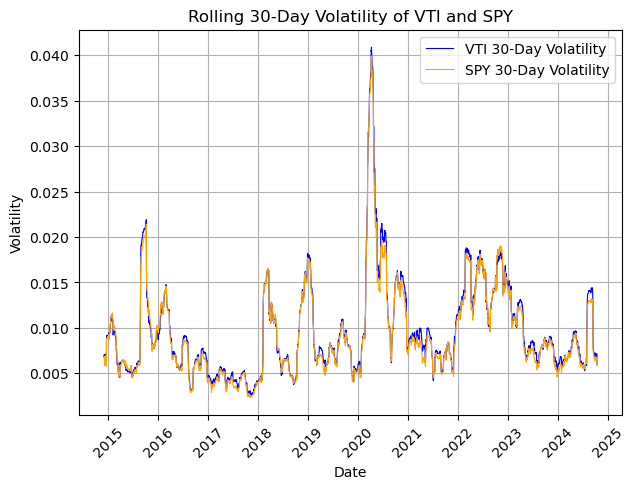

In [8]:
# Rolling volatility (30-day window)
TotalIndex['VTI_Volatility'] = TotalIndex['VTI_Returns'].rolling(window=30).std()
TotalIndex['SPY_Volatility'] = TotalIndex['SPY_Returns'].rolling(window=30).std()

# Plot Volatility
plt.figure(figsize=(7, 5))

#VTI Plot
plt.plot(TotalIndex['Date'], TotalIndex['VTI_Volatility'], color='blue', 
         label='VTI 30-Day Volatility', linewidth=0.8)
#SPY Plot
plt.plot(TotalIndex['Date'], TotalIndex['SPY_Volatility'], color='orange', 
         label='SPY 30-Day Volatility', linewidth=0.8)

plt.title('Rolling 30-Day Volatility of VTI and SPY')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

***Graph 5: rolling 30-day volatility of VTI vs SPY*** 
<br>

**Overview:**
<br>
The blue line represents VTI's 30-day volatility, while the orange line represents SPY's 30-day volatility. Rolling volatility calculates how much returns fluctuate over a 30-day window, updating daily, to track short-term fluctuations in market stability. 
Key Observation: Both VTI and SPY exhibit nearly identical volatility patterns throughout the time period, suggesting that large-cap stocks (SPY) and the broader market (VTI) experience similar levels of market risk in most periods. The lines track closely to each other, indicating that both ETFs react similarly to market conditions and changes in volatility. The most prominent volatility spike occurs in early 2020, corresponding to the onset of the COVID-19 pandemic. This is when the market experienced extreme uncertainty, and volatility reached its highest point (around 0.04 or 4% daily returns standard deviation). After the spike in 2020, volatility decreased gradually but remains higher than in pre-pandemic years until late 2021. Other smaller volatility peaks can be seen in 2015, 2018, and 2022. These may be related to other market events, such as interest rate changes, trade tensions, or geopolitical risks. In general, both ETFs exhibit lower volatility between mid-2021 and 2025 compared to earlier years, suggesting more market stability during this period.
<br>

**How this graph relates to our research question:** 
<br>
*Volatility Comparison:*
This graph provides direct insight into the volatility of large-cap stocks (SPY) compared to the broader market (VTI). Since the two lines track each other closely, it suggests that both ETFs experience similar levels of risk over time. There may be minor differences during certain periods (e.g., SPY volatility seems slightly higher around 2016), but overall, the risk exposure for both appears quite similar.
<br>

*Reaction to Economic Events:*
The sharp volatility spike during the COVID-19 pandemic in 2020 indicates that both SPY and VTI were affected similarly, with heightened market fluctuations during this crisis. This supports your analysis of how the two ETFs reacted to significant economic events. The gradual decline in volatility after the pandemic shows how both markets stabilized during the recovery period.
<br>

*Investment Implications:*
For investors comparing SPY and VTI, this graph suggests that the two ETFs present similar volatility profiles. Large-cap stocks (SPY) are not significantly more volatile than the broader market (VTI), meaning that from a risk perspective, investing in SPY is comparable to investing in the entire market (VTI).


**Plotting a Difference in Cumulative Returns for VTI and SPY** <br>
***Goal:*** See when VTI or SPY return a higher amount than the other
- When the difference in cumulative returns is positive, VTI has outperformed SPY.
- When the difference is negative, SPY has outperformed VTI.

***Steps***
1) Calculate Cumulative difference between VTI and SPY by subtracting the two
2) Plot VTI and SPY on the same axes so they overlap

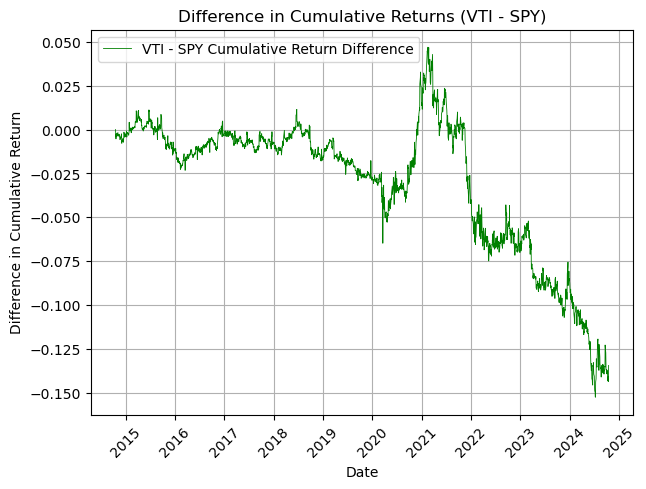

In [9]:
#Calculating the difference between cumulative returns
TotalIndex['Cumulative_Difference'] = TotalIndex['VTI_Cumulative'] - TotalIndex['SPY_Cumulative']

#Plot
plt.figure(figsize=(7, 5))
plt.plot(TotalIndex['Date'], TotalIndex['Cumulative_Difference'], color='green', 
         label='VTI - SPY Cumulative Return Difference', linewidth=0.6)
plt.title('Difference in Cumulative Returns (VTI - SPY)')
plt.xlabel('Date')
plt.ylabel('Difference in Cumulative Return')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

***Graph 6 Graph Overview:*** 
<br>

The difference starts around 0, meaning the cumulative returns of VTI and SPY were quite similar in 2015. Over time, the difference becomes increasingly negative, indicating that SPY has outperformed VTI in terms of cumulative returns. By 2025, the difference has dropped to approximately -0.15, meaning SPY has cumulatively returned 15% more than VTI. Furthermore, the graph shows a few periods where the difference fluctuates around 0, particularly from 2016 to 2018 when the cumulative returns of both ETFs were closely aligned. After the COVID-19 pandemic in 2020, the gap between SPY and VTI widened significantly, with SPY outperforming VTI at an accelerated rate. This suggests that large-cap stocks (SPY) recovered more robustly from the pandemic than the broader market (VTI). From 2021 onward, the cumulative return difference becomes increasingly negative, showing that SPY (S&P 500) has consistently outpaced VTI (broader market), especially aftermarket recoveries from significant economic events.
<br>

**How This Relates to Our Research Question:**
<br>
*Performance Comparison:* Over the past 10 years, SPY has outperformed VTI by an increasing margin, particularly after the pandemic.
Reaction to Economic Events: The sharp divergence post-2020 indicates that large-cap stocks (SPY) recovered more strongly than the broader market (VTI) following the COVID-19 pandemic, as reflected in the widening gap. This suggests that SPY may have been more resilient during periods of economic recovery.
<br>

*Practical Implications for Investors:* The widening gap in cumulative returns implies that investors who focus on large-cap stocks (SPY) may have achieved better overall performance than those who invested in the broader market (VTI), especially in the post-pandemic recovery period.


#### Data Description

### About the Data Graph:
- **X-Axis**: Represents the time period, spanning from 2015 to 2025.
- **Y-Axis**: Represents the opening prices of VTI and SPY.
- **Orange Line (SPY)**: Tracks the opening prices of the SPY (S&P 500 ETF).
- **Blue Line (VTI)**: Tracks the opening prices of the VTI (Vanguard Total Stock Market ET#F.

#### Observations (Rows) and Attributes (Columns):
- **Observations (Rows)**:  
  Each row in the dataset represents a specific date on which trading occurred, providing information about the opening prices of both SPY and VTI on that day.

- **Attributes (Columns)**:
  - **Date**: The trading date.
  - **VTI**: The opening price of the Vanguard Total Stock Market ETF (VTI) on that date.
  - **SPY**: The opening price of the S&P 500 ETF (SPY) on#that date.

#### Why Was the Dataset Created?
The dataset was created to help answer our research questions by tracking the historical performance of VTI and SPY over time. By providing information about their opening prices and supporting summary statistics, this dataset allows us to:
- Identify trends and patterns in stock prices over time.
- Explore potential correlations with external factors like global events.
- Compare the performance and volatility of large-cap stocks (SPY) with the broader market (VTI).

This analysis enables us to gain insights into market behavior and volatility in response tos#ignificant events.

#### Who Funded the Creation of the Dataset#
*To be determined.*

#### What Processes Might Have Influenced What Data Was Observed and Recorded and What Was Not?
- **Stock Market Closure Dates**: Only data from active trading days is recorded, so the dataset excludes weekends and holidays whe#nthe markets are closed.

#### Preprocessing Done to the Dataset:
- **Data Cleansing**: Removed any unnecessary white spaces in column names and ensured consistent formatting.
- **Data Formatting**: Converted the Date column to datetime format to allow for easier manipulation and plotting.
- **Merging Datasets**: Merged the SPY and VTI data based on the Date column using an SQL query to create a combined dataframe for comparative analysis.

#### Were People Involved in the Data Collection?
No individuals were directly involved in the collection of this dataset. It consists entirely of publicly available stock market data, which reflects market activity rather than personal information. Therefore, there are no concerns about the involvement of human subjects.

Because this dataset relates to publicly traded financial instruments, it is intended for use by analysts, researchers, investors, and the public for a wide variety of purposes such as financial analysis, market predictions, and academic research.


### Potential Data Limitations

#### Overlapping Events
- **Issue**: Multiple global events may overlap in time (e.g., an election occurring during a pandemic), making it difficult to isolate the impact of individual events on stock performance.
- **Impact**: This could confound the results, making it harder to attribute market fluctuations to a single event.

#### Market Reactions May Be Delayed
- **Issue**: Markets may not react to global events immediately, or the effects might be spread over a longer time period. This may create incorrect analysis for short-term/long-term impacts.
- **Impact**: Focusing too narrowly on short-term performance might miss the longer-term effects of events on SPY and VTI.

#### External Influences
- **Issue**: Other unrelated market forces, such as interest rate changes or corporate earnings reports which we did not account for in our dataset, could also be a major influence on stock prices around the same time as global events.
- **Impact**: These factors might obscure the true impact of global events on SPY and VTI.

#### Potential Data Gaps or Missing Data (NaN)
- **Issue**: Historical price data for SPY and VTI might have gaps or missing values, especially around holidays or periods when markets are closed.
- **Impact**: This can skew your analysis if missing data occurs during or right after global events.


#### Summary Statistics

**Overall**:  
This analysis shows that while both ETFs behave similarly overall, the broader market exposure of VTI results in marginally higher risk and reward during periods of market volatility.

- **Mean (Average Return)**:
  - **VTI**: 0.000489
  - **SPY**: 0.000503
  - **Interpretation**:  
    The mean return for both ETFs is quite similar, with SPY having a slightly higher average return per time period (likely daily returns). Both values are very close to zero, which is typical for short-term stock return data. Over long periods, positive returns accumulate, but on a day-to-day basis, the average return is relatively small.

- **Standard Deviation (Measure of Volatility or Risk)**:
  - **VTI**: 0.010912
  - **SPY**: 0.010595
  - **Interpretation**:  
    Both ETFs have nearly identical volatility, with VTI being very slightly more volatile. This shows that both ETFs experience relatively similar daily price fluctuations, though VTI (with broader market exposure) has marginally higher volatility compared to SPY, which focuses only on large-cap stocks.

- **Minimum (Largest Negative Daily Return)**:
  - **VTI**: -0.086744
  - **SPY**: -0.087994
  - **Interpretation**:  
    Both ETFs experienced sharp declines, with SPY showing a slightly larger drop of about -8.8% compared to VTI’s -8.7%. These large negative values likely correspond to significant market downturns or global events such as the COVID-19 market crash in early 2020.

- **Maximum (Largest Positive Daily Return)**:
  - **VTI**: 0.066885
  - **SPY**: 0.063489
  - **Interpretation**:  
    VTI’s highest daily gain is slightly higher at around 6.7%, compared to SPY’s 6.3%. This suggests that on its best days, VTI (representing the broader market) had slightly larger positive returns than SPY, which focuses on large-cap stocks.

#### Trends, Patterns, Correlation

1. **VTI vs. SPY Open Prices**:
   - **Trend**: Both VTI (blue line) and SPY (orange line) show an upward trend in price from 2015 to 2025. SPY has a consistently higher price than VTI, reflecting that SPY tracks large-cap stocks in the S&P 500, which tend to perform better on average than smaller stocks included in VTI (which tracks the broader market).
   - **Notable Events**: Around 2020, there is a significant drop in both ETFs, corresponding to the COVID-19 market crash. This shows a sharp decline in prices followed by a strong recovery in both cases, with SPY rebounding faster and more strongly than VTI.

2. **Daily Returns for VTI and SPY**:
   - **Volatility**: Both charts show spikes in daily returns for VTI and SPY, with the highest volatility occurring in 2020 during the COVID-19 pandemic. VTI's daily returns (blue chart) and SPY's (orange chart) have similar patterns, but VTI's volatility appears slightly higher in some periods, likely due to the inclusion of smaller, more volatile stocks in VTI, compared to the large-cap focus of SPY.
   - **Range**: The daily returns of both ETFs are centered around 0 (minimal daily returns most of the time), but extreme events (like the 2020 crash) show both positive and negative spikes.
   - **Pattern**: Both ETFs show greater fluctuations during periods of economic uncertainty or crisis (e.g., 2020). After the 2020 volatility spike, daily returns begin to stabilize again, with both ETFs resuming regular fluctuations around 0.

3. **VTI Cumulative Returns with Linear Regression**:
   - **Long-Term Growth**: The cumulative returns for VTI show a steady upward trend from 2015 to 2025, despite periods of volatility (e.g., around 2020). The linear regression line (red) shows a clear long-term growth trend for VTI, indicating that despite short-term volatility, the overall direction is positive.
   - **Volatility**: The steep dips in the cumulative returns around 2020 show the effects of the pandemic, but the recovery is strong, with VTI returning to the growth trendline after the market stabilizes.
   - **Linear Growth**: The linear regression line suggests a consistent long-term growth rate for VTI, even with market volatility. This is typical for long-term stock market investments, where short-term fluctuations tend to be smoothed out over time.

4. **Impact of Global Events (e.g., COVID-19)**:
   - Both VTI and SPY experienced sharp declines and rapid recoveries during the COVID-19 market crash of 2020, showing that external events cause short-term volatility, but long-term trends remain positive.

5. **Consistent Long-Term Growth**:
   - Despite the short-term volatility seen in both ETFs, the linear regression applied to VTI shows that its cumulative returns follow a steady upward trajectory over the long term, indicating the reliability of stock market growth for long-term investors.

6. **Correlation (VTI vs. SPY)**:
   - **Correlation**: Both VTI and SPY are highly correlated, moving in similar directions over time, especially in response to major market events like the 2020 pandemic crash. This is expected as both ETFs track U.S. stock markets, with SPY focusing on large-cap stocks and VTI covering the entire market (large, mid, and small caps).
   - **Differences in Volatility**: VTI, which includes smaller-cap stocks, shows slightly higher volatility in daily returns compared to SPY, which is dominated by large-cap, more stable companies.

#### Outliers

1. **Major Spike in Volatility in 2020 (Pandemic Crash)**:
   - **Outlier 1: Early 2020 Market Crash (COVID-19)**:  
     The most significant outlier across all graphs is the sharp drop in prices and returns during the early 2020 market crash, caused by the onset of the COVID-19 pandemic. This is evident in both VTI and SPY:
     - VTI experienced a downward spike in returns below -0.08 (or -8%) and a large upward spike above 0.06 (or 6%) during the same period.
     - SPY exhibited a similar pattern, though with slightly less pronounced volatility, indicating that large-cap stocks were somewhat more resilient than the broader market represented by VTI.
     - **Daily Returns**: There was a large downward spike followed by increased volatility, as daily returns fluctuated heavily during the early stages of the pandemic.
     - **Cumulative Returns**: A significant deviation below the trendline during the crash was followed by a rapid recovery, showing the market's resilience after the initial shock.

   - **Outlier 2: Post-Recovery Spike (Late 2020 to 2021)**:  
     The rapid recovery in late 2020 and throughout 2021 is also an outlier, as both SPY and VTI experienced above-average growth compared to historical trends. This growth was largely driven by government stimulus measures, low-interest rates, and overall market optimism about a swift economic recovery.

   - **Implication**:  
     These outliers highlight the correlation between major global events (in this case, the COVID-19 pandemic) and heightened volatility in both ETFs. This supports the hypothesis that global crises can lead to significant spikes in volatility, which can be used to address the research questions regarding how external events impact market behavior.

2. **Spike in Volatility in 2015**:
   - **Event**: The middle of 2015 saw a notable increase in market volatility, corresponding to several key economic and geopolitical factors.
     - December 2015 marked a critical turning point when the Federal Reserve raised interest rates for the first time in almost a decade. This signaled confidence in the U.S. economic recovery, leading to a boost in stock prices.
     - Favorable conditions, including a strong U.S. dollar, a booming tech sector, and lower oil prices, created a positive environment for corporate profitability and market growth, driving stock prices higher.
     - Despite concerns about China's economic slowdown and global market volatility, the U.S. market remained a stable, safe haven for investors, resulting in price increases for both SPY and VTI.
   - **Implication**:  
     This outlier reflects how domestic monetary policy, particularly Fed interest rate changes, can create significant market movements. It underscores the impact of U.S. economic strength in periods of global uncertainty, pushing up stock prices even as other markets face challenges.

3. **Drop in 2019**:
   - **Event**: The drop in 2019 can be attributed primarily to the escalation of the U.S.-China trade war, which caused widespread market volatility.
     - The imposition of multiple rounds of tariffs and the breakdown of trade negotiations between the U.S. and China shook investor confidence, resulting in market sell-offs.
     - Concerns about a global economic slowdown—exacerbated by weaker growth in Europe and China—further contributed to the decline, as fears of a recession grew both domestically and internationally.
     - The inversion of the yield curve in mid-2019—a historical predictor of recessions—added to the market's anxiety, causing further declines.
     - While the Federal Reserve’s interest rate cuts later in


### Questions for Reviewers

1. **Do the research questions provide a solid foundation for the analysis of SPY vs. VTI during global events?**  
   - Should we add more, or is there any question that is difficult to interpret or understand?

2. **Does the comparison between SPY and VTI make sense for analyzing the impact of global events, or should another comparison be considered?**  
   - We did talk about doing more industry-specific market analysis (e.g., vehicles or technology industry).

3. **Does the choice of summary statistics make sense?**  
   - Should we add more statistics like range (time period), beta, correlation coefficient, or outliers?

4. **For the exploratory data analysis, should they be presented in pie graphs like the investment fund/graph format?**  
   - Would another format be more suitable for our analysis?
